In [14]:
import skimage
from skimage import io
import matplotlib.pyplot as plt

In [66]:
# PATH_TO_IMAGE =  '../OPT Shared files/2022-10-20 Finding focal plane/2022-10-20/20221020-grating/2022-10-20 grating positioning/MMStack_Pos0.ome.tif'
PATH_TO_IMAGE =  '../OPT Shared files/2022-10-21 grating contd/grating only/MMStack_Pos0.ome.tif'


#/Users/kenton/Library/CloudStorage/OneDrive-ImperialCollegeLondon/University/Physics/Year 4/project/OPT Shared files/2022-10-21 grating contd/grating only

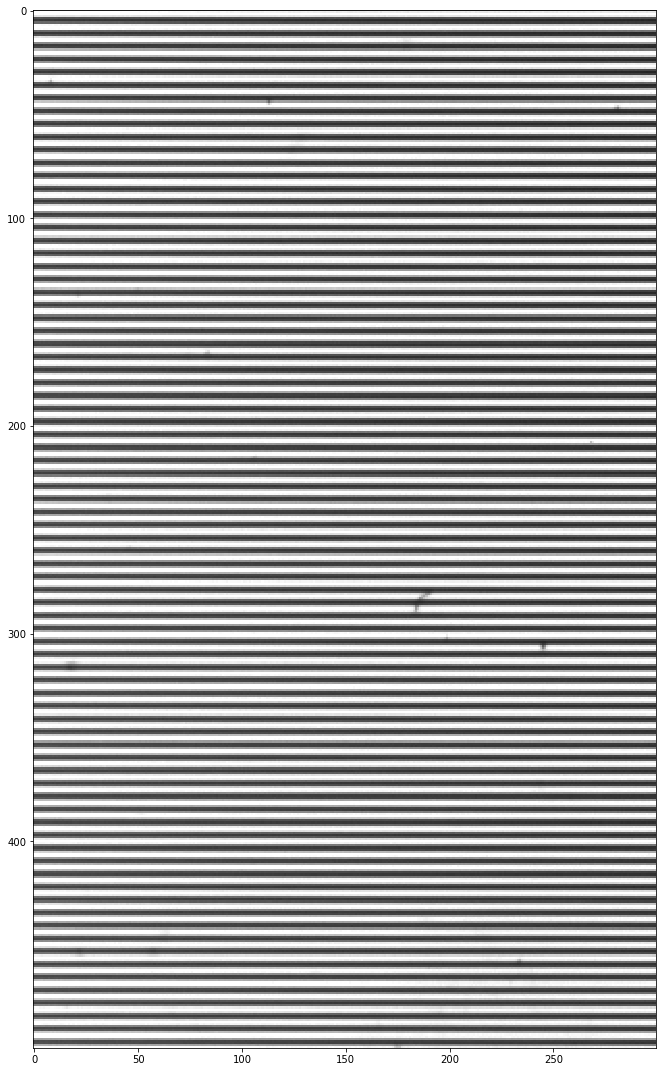

In [78]:
im = io.imread(PATH_TO_IMAGE)[300:800, 300:600]
plt.figure(figsize=(15,15))
io.imshow(im)

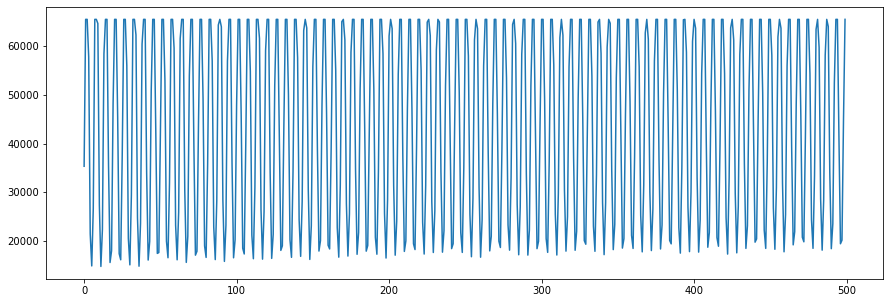

In [79]:
plt.figure(figsize=(15,5))
plt.plot(im[:,0])

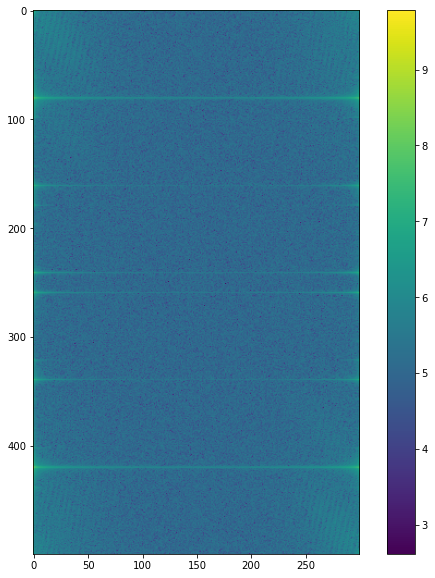

In [84]:
from scipy.fft import fft2,fftshift
import numpy as np
ft = fft2(im)
plt.figure(figsize=(10,10))
ft_log = np.log10(np.abs(ft))
plt.imshow(ft_log)
plt.colorbar()

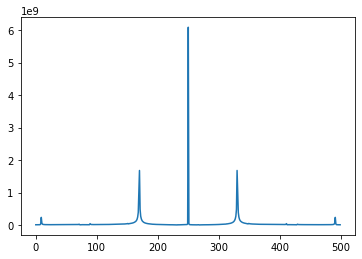

In [86]:
plt.plot(fftshift(np.abs(ft)[:,0]))

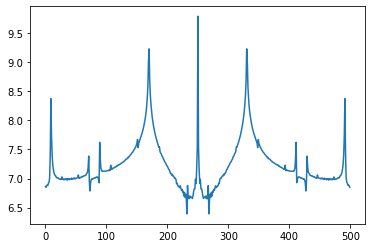

In [85]:
plt.plot(fftshift(ft_log[:, 0]))